In [ ]:
'''
#Train a simple deep CNN on the CIFAR10 small images dataset.
It gets to 75% validation accuracy in 25 epochs, and 79% after 50 epochs.
(it's still underfitting at that point, though).
'''
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

In [ ]:
batch_size = 512
num_classes = 10
epochs = 10
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

170498071/170498071 [==============================] - 13s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
print(y_train.shape)
print(x_train[1,:,:,1])

(50000, 10)
[[177 137 104 ...  95  90  81]
 [160 153 125 ...  99  80  73]
 [155 146 115 ...  82  70  69]
 ...
 [167 154 160 ...  34  53  83]
 [154 152 161 ...  93 114 121]
 [148 148 156 ... 133 134 133]]


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
    input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
# initiate RMSprop optimizer
opt = keras.optimizers.legacy.RMSprop(learning_rate=0.0005, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
  optimizer=opt,
  metrics=['accuracy'])

if not data_augmentation:
  print('Not using data augmentation.')
  model.fit(x_train, y_train,
      batch_size=batch_size,
      epochs=epochs,
      validation_data=(x_test, y_test),
      shuffle=True)
else:
  print('Using real-time data augmentation.')
  # This will do preprocessing and realtime data augmentation:
  datagen = ImageDataGenerator(
    featurewise_center=False, # set input mean to 0 over the dataset
    samplewise_center=False, # set each sample mean to 0
    featurewise_std_normalization=False, # divide inputs by std of the dataset
    samplewise_std_normalization=False, # divide each input by its std
    zca_whitening=False, # apply ZCA whitening
    zca_epsilon=1e-06, # epsilon for ZCA whitening
    rotation_range=0, # randomly rotate images in the range (degrees, 0 to 180)
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.1,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.1,
    shear_range=0., # set range for random shear
    zoom_range=0., # set range for random zoom
    channel_shift_range=0., # set range for random channel shifts
    # set mode for filling points outside the input boundaries
    fill_mode='nearest',
    cval=0., # value used for fill_mode = "constant"
    horizontal_flip=True, # randomly flip images
    vertical_flip=False, # randomly flip images
    # set rescaling factor (applied before any other transformation)
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=None,
    # image data format, either "channels_first" or "channels_last"
    data_format=None,
    # fraction of images reserved for validation (strictly between 0 and 1)
    validation_split=0.0)
  # Compute quantities required for feature-wise normalization
  # (std, mean, and principal components if ZCA whitening is applied).
  datagen.fit(x_train)

  # Fit the model on the batches generated by datagen.flow().
  history_cnn=model.fit_generator(datagen.flow(x_train, y_train,
                  batch_size=batch_size),
            epochs=epochs,
            validation_data=(x_test, y_test),
            workers=4)



Using real-time data augmentation.


<ipython-input-15-bd0acd8b288d>:52: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_cnn=model.fit_generator(datagen.flow(x_train, y_train,


Epoch 1/10
98/98 [==============================] - 42s 318ms/step - loss: 2.0313 - accuracy: 0.2604 - val_loss: 1.7194 - val_accuracy: 0.4120
Epoch 2/10
98/98 [==============================] - 33s 330ms/step - loss: 1.7704 - accuracy: 0.3635 - val_loss: 1.5122 - val_accuracy: 0.4630
Epoch 3/10
98/98 [==============================] - 34s 338ms/step - loss: 1.6408 - accuracy: 0.4109 - val_loss: 1.4176 - val_accuracy: 0.4916
Epoch 4/10
98/98 [==============================] - 34s 337ms/step - loss: 1.5447 - accuracy: 0.4474 - val_loss: 1.5489 - val_accuracy: 0.4608
Epoch 5/10
98/98 [==============================] - 33s 335ms/step - loss: 1.4650 - accuracy: 0.4766 - val_loss: 1.2438 - val_accuracy: 0.5585
Epoch 6/10
98/98 [==============================] - 33s 321ms/step - loss: 1.3941 - accuracy: 0.5037 - val_loss: 1.3177 - val_accuracy: 0.5332
Epoch 7/10
98/98 [==============================] - 33s 333ms/step - loss: 1.3392 - accuracy: 0.5219 - val_loss: 1.1457 - val_accuracy: 0.5942

In [ ]:

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/saved_models/keras_cifar10_trained_model.h5 


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:

scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 3ms/step - loss: 1.0577 - accuracy: 0.6269
Test loss: 1.0576719045639038
Test accuracy: 0.6269000172615051


In [ ]:
x_train[1,:,:,1]

array([[0.69411767, 0.5372549 , 0.40784314, ..., 0.37254903, 0.3529412 ,
        0.31764707],
       [0.627451  , 0.6       , 0.49019608, ..., 0.3882353 , 0.3137255 ,
        0.28627452],
       [0.60784316, 0.57254905, 0.4509804 , ..., 0.32156864, 0.27450982,
        0.27058825],
       ...,
       [0.654902  , 0.6039216 , 0.627451  , ..., 0.13333334, 0.20784314,
        0.3254902 ],
       [0.6039216 , 0.59607846, 0.6313726 , ..., 0.3647059 , 0.44705883,
        0.4745098 ],
       [0.5803922 , 0.5803922 , 0.6117647 , ..., 0.52156866, 0.5254902 ,
        0.52156866]], dtype=float32)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical

#注意归一化不要重复进行
#x_train = x_train.astype('float32')
#x_test = x_test.astype('float32')
#x_train /= 255
#x_test /= 255

def build_model(hidden_layers=0):
    model = Sequential()
    model.add(Flatten(input_shape=x_train.shape[1:]))  # Flatten the input images
    for _ in range(hidden_layers):
        model.add(Dense(512, activation='relu'))
        model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))  # Output layer
    return model

In [ ]:

results = {}

from tensorflow.keras.optimizers import Adam


for i in range(5):  # For models with 0 to 4 hidden layers
    model = build_model(hidden_layers=i)
    model.compile(loss='categorical_crossentropy', optimizer= Adam(learning_rate=0.0001), metrics=['accuracy'])
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=512, verbose=2)
    results[i] = history.history['val_accuracy']

#CNN的结果要写在循环外面
results['CNN'] = history_cnn.history['val_accuracy']


Epoch 1/10
98/98 - 2s - loss: 2.2019 - accuracy: 0.2014 - val_loss: 2.0652 - val_accuracy: 0.2737 - 2s/epoch - 24ms/step
Epoch 2/10
98/98 - 1s - loss: 2.0076 - accuracy: 0.2960 - val_loss: 1.9706 - val_accuracy: 0.3078 - 549ms/epoch - 6ms/step
Epoch 3/10
98/98 - 1s - loss: 1.9382 - accuracy: 0.3258 - val_loss: 1.9216 - val_accuracy: 0.3326 - 619ms/epoch - 6ms/step
Epoch 4/10
98/98 - 1s - loss: 1.8998 - accuracy: 0.3410 - val_loss: 1.8940 - val_accuracy: 0.3370 - 557ms/epoch - 6ms/step
Epoch 5/10
98/98 - 1s - loss: 1.8747 - accuracy: 0.3489 - val_loss: 1.8697 - val_accuracy: 0.3492 - 628ms/epoch - 6ms/step
Epoch 6/10
98/98 - 1s - loss: 1.8556 - accuracy: 0.3581 - val_loss: 1.8563 - val_accuracy: 0.3552 - 614ms/epoch - 6ms/step
Epoch 7/10
98/98 - 1s - loss: 1.8425 - accuracy: 0.3642 - val_loss: 1.8426 - val_accuracy: 0.3570 - 599ms/epoch - 6ms/step
Epoch 8/10
98/98 - 1s - loss: 1.8309 - accuracy: 0.3689 - val_loss: 1.8329 - val_accuracy: 0.3669 - 553ms/epoch - 6ms/step
Epoch 9/10
98/98 -

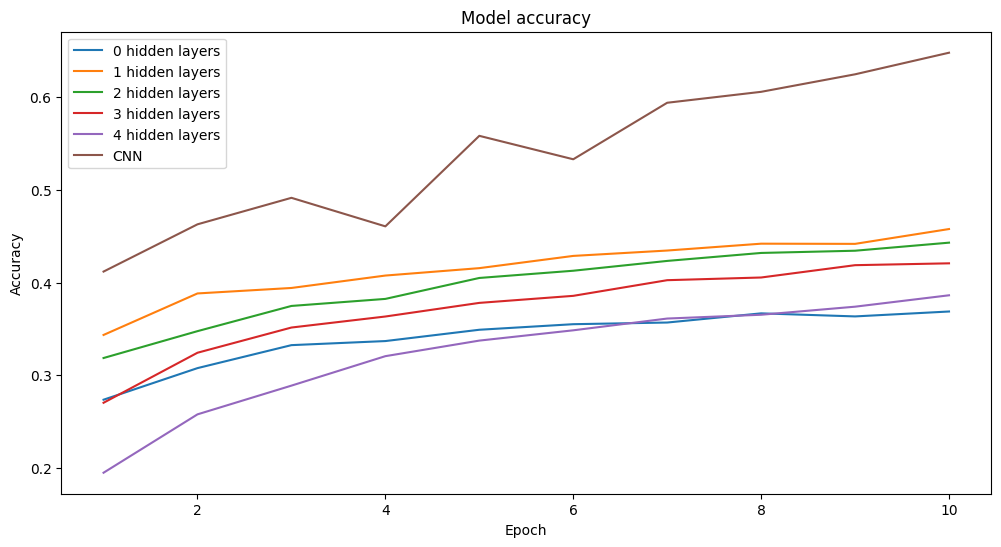

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for key, val_accuracy in results.items():
    plt.plot(range(1, 11), val_accuracy, label=f'{key} hidden layers' if isinstance(key, int) else key)

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#以下是question 2


In [ ]:

def build_model(activation='relu'):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',
    input_shape=x_train.shape[1:]))
    model.add(Activation(activation))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation(activation))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation(activation))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation(activation))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation(activation))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    return model






In [ ]:
x_train[1,:,:,1]

array([[0.69411767, 0.5372549 , 0.40784314, ..., 0.37254903, 0.3529412 ,
        0.31764707],
       [0.627451  , 0.6       , 0.49019608, ..., 0.3882353 , 0.3137255 ,
        0.28627452],
       [0.60784316, 0.57254905, 0.4509804 , ..., 0.32156864, 0.27450982,
        0.27058825],
       ...,
       [0.654902  , 0.6039216 , 0.627451  , ..., 0.13333334, 0.20784314,
        0.3254902 ],
       [0.6039216 , 0.59607846, 0.6313726 , ..., 0.3647059 , 0.44705883,
        0.4745098 ],
       [0.5803922 , 0.5803922 , 0.6117647 , ..., 0.52156866, 0.5254902 ,
        0.52156866]], dtype=float32)

In [ ]:
opt = keras.optimizers.legacy.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
  optimizer=opt,
  metrics=['accuracy'])

activation_functions = ['relu', 'sigmoid']
results = {}

for activation in activation_functions:
    model = build_model(activation=activation)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    if not data_augmentation:
        print('Not using data augmentation.')
        history = model.fit(
            x_train, y_train,
            batch_size=batch_size,
            epochs=10,  # 如果你想进行更多轮的训练，可以增加这个数值
            validation_data=(x_test, y_test),
            shuffle=True
        )
    else:
        print('Using real-time data augmentation.')
        # ... （这里是你的数据增强代码）
        history = model.fit_generator(
            datagen.flow(x_train, y_train, batch_size=batch_size),
            epochs=10,  # 同样，根据需要调整轮数
            validation_data=(x_test, y_test),
            workers=4
        )

    results[activation] = history.history['val_accuracy']

# ... （然后是你的绘图代码，从results字典中获取数据以绘制图表）


Using real-time data augmentation.


<ipython-input-21-dda2eb439afc>:27: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
98/98 [==============================] - 35s 341ms/step - loss: 2.0952 - accuracy: 0.2206 - val_loss: 1.8969 - val_accuracy: 0.3451
Epoch 2/10
98/98 [==============================] - 32s 318ms/step - loss: 1.8796 - accuracy: 0.3191 - val_loss: 1.7822 - val_accuracy: 0.3669
Epoch 3/10
98/98 [==============================] - 33s 322ms/step - loss: 1.7902 - accuracy: 0.3506 - val_loss: 1.7216 - val_accuracy: 0.3908
Epoch 4/10
98/98 [==============================] - 33s 328ms/step - loss: 1.7380 - accuracy: 0.3700 - val_loss: 1.6601 - val_accuracy: 0.4134
Epoch 5/10
98/98 [==============================] - 34s 328ms/step - loss: 1.6899 - accuracy: 0.3844 - val_loss: 1.5726 - val_accuracy: 0.4389
Epoch 6/10
98/98 [==============================] - 32s 318ms/step - loss: 1.6517 - accuracy: 0.3986 - val_loss: 1.6752 - val_accuracy: 0.4102
Epoch 7/10
98/98 [==============================] - 33s 327ms/step - loss: 1.6177 - accuracy: 0.4097 - val_loss: 1.4886 - val_accuracy: 0.4649

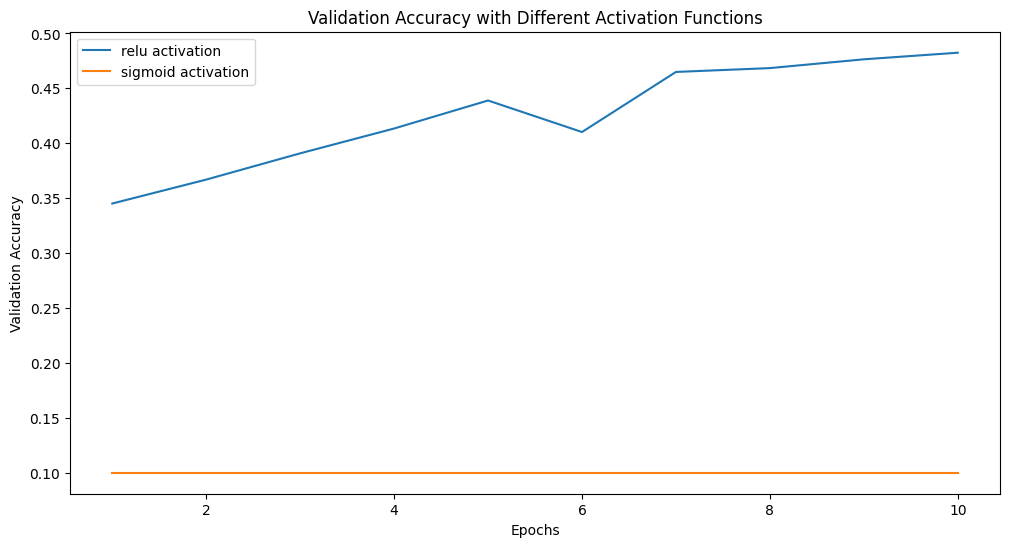

In [ ]:
import matplotlib.pyplot as plt

# 设置画布大小
plt.figure(figsize=(12, 6))

# 从results中提取每个激活函数的验证准确性列表，并将其添加到图表中
for activation, val_accuracy in results.items():
    plt.plot(range(1, 11), val_accuracy, label=f'{activation} activation')

# 添加标题和轴标签
plt.title('Validation Accuracy with Different Activation Functions')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')

# 显示图例和图形
plt.legend()
plt.show()



In [ ]:
#以下是question 3

170498071/170498071 [==============================] - 4s 0us/step
Training model with dropout=True, data_augmentation=True
Using real-time data augmentation.
Epoch 1/50
48/48 [==============================] - 39s 527ms/step - loss: 2.1800 - accuracy: 0.1855 - val_loss: 2.0227 - val_accuracy: 0.2925
Epoch 2/50
48/48 [==============================] - 26s 534ms/step - loss: 2.0037 - accuracy: 0.2630 - val_loss: 1.9090 - val_accuracy: 0.3363
Epoch 3/50
48/48 [==============================] - 26s 534ms/step - loss: 1.9081 - accuracy: 0.3059 - val_loss: 1.7988 - val_accuracy: 0.3714
Epoch 4/50
48/48 [==============================] - 24s 504ms/step - loss: 1.8502 - accuracy: 0.3272 - val_loss: 1.7546 - val_accuracy: 0.3804
Epoch 5/50
48/48 [==============================] - 24s 494ms/step - loss: 1.8108 - accuracy: 0.3454 - val_loss: 1.7051 - val_accuracy: 0.3951
Epoch 6/50
48/48 [==============================] - 24s 493ms/step - loss: 1.7773 - accuracy: 0.3544 - val_loss: 1.6915 - val_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/50
48/48 [==============================] - 6s 116ms/step - loss: 2.1934 - accuracy: 0.1864 - val_loss: 2.0544 - val_accuracy: 0.2611
Epoch 2/50
48/48 [==============================] - 4s 90ms/step - loss: 1.9662 - accuracy: 0.2851 - val_loss: 1.8739 - val_accuracy: 0.3394
Epoch 3/50
48/48 [==============================] - 5s 101ms/step - loss: 1.8591 - accuracy: 0.3266 - val_loss: 1.7771 - val_accuracy: 0.3696
Epoch 4/50
48/48 [==============================] - 4s 90ms/step - loss: 1.7918 - accuracy: 0.3547 - val_loss: 1.7504 - val_accuracy: 0.3734
Epoch 5/50
48/48 [==============================] - 4s 90ms/step - loss: 1.7388 - accuracy: 0.3726 - val_loss: 1.7158 - val_accuracy: 0.3837
Epoch 6/50
48/48 [==============================] - 5s 104ms/step - loss: 1.6956 - accuracy: 0.3898 - val_loss: 1.6343 - val_accuracy: 0.4131
Epoch 7/50
48/48 [==============================] - 4s 89ms/step - loss: 1.6586 - accuracy: 0.3987 - val_loss: 1.6127 - val_accuracy: 0.4192
Epoch 8/50

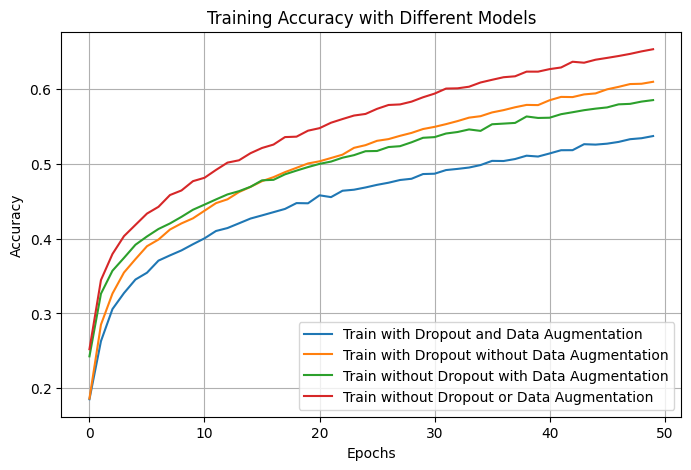

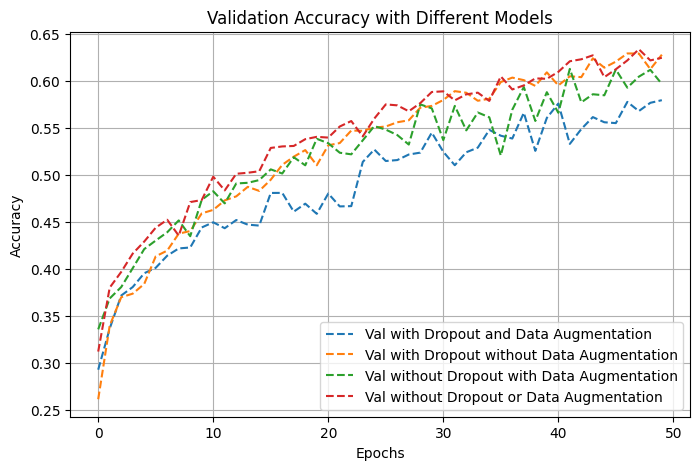

In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import matplotlib.pyplot as plt

batch_size = 1024
num_classes = 10
epochs = 50  # 可以根据需要减少epochs以加快训练过程
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# 数据加载
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# 模型构建函数
def build_model(with_dropout=True):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    if with_dropout:
        model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    if with_dropout:
        model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    if with_dropout:
        model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    opt = keras.optimizers.legacy.RMSprop(learning_rate=0.0001, decay=1e-6)

    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    return model

# 数据增强配置
def data_augmentation(data_augmentation=True):
    if not data_augmentation:
        print('Not using data augmentation.')
        datagen = ImageDataGenerator()
        # history = model.fit(x_train, y_train,
        #                 batch_size=batch_size,
        #                 epochs=epochs,
        #                 validation_data=(x_test, y_test),
        #                 shuffle=True,
        #                 validation_freq=5) 这段代码用来减少验证频次
    else:
        print('Using real-time data augmentation.')
        datagen = ImageDataGenerator(
            width_shift_range=0.1,  # randomly shift images horizontally
            height_shift_range=0.1,  # randomly shift images vertically
            horizontal_flip=True)  # randomly flip images
            #可以增加validation_freq 来减少运算时间，但如果不是每个epoch都验证，
            #可能会错过一些重要的数据变化瞬间
            # history = model.fit_generator(datagen.flow(x_train, y_train,
            #                          batch_size=batch_size),
            #                       epochs=epochs,
            #                       validation_data=(x_test, y_test),
            #                       workers=4,
            #                       validation_freq=5)

    return datagen

# 训练四个模型
histories = []
for with_dropout in [True, False]:
    for with_data_aug in [True, False]:
        print(f"Training model with dropout={with_dropout}, data_augmentation={with_data_aug}")
        model = build_model(with_dropout=with_dropout)
        datagen = data_augmentation(data_augmentation=with_data_aug)
        datagen.fit(x_train)

        history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                            steps_per_epoch=x_train.shape[0] // batch_size,
                            epochs=epochs,
                            validation_data=(x_test, y_test))
        histories.append(history)

        # 保存模型
        if not os.path.isdir(save_dir):
            os.makedirs(save_dir)
        model_path = os.path.join(save_dir, model_name)
        model.save(model_path)
        print(f'Saved trained model at {model_path}')
#画图
def plot_histories(histories, metric='train'):
    plt.figure(figsize=(8, 5))

    for history, label in histories:
        if metric == 'train':
            plt.plot(history.epoch, history.history['accuracy'], label=f'Train {label}')
        else:
            plt.plot(history.epoch, history.history['val_accuracy'], '--', label=f'Val {label}')

    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    if metric == 'train':
        plt.title('Training Accuracy with Different Models')
    else:
        plt.title('Validation Accuracy with Different Models')
    plt.legend()
    plt.grid(True)
    plt.show()

# 从history对象中提取准确率数据并绘制
model_conditions = [
    "with Dropout and Data Augmentation",
    "with Dropout without Data Augmentation",
    "without Dropout with Data Augmentation",
    "without Dropout or Data Augmentation"
]

# 绘制训练准确率图
plot_histories(zip(histories, model_conditions), metric='train')

# 绘制验证准确率图
plot_histories(zip(histories, model_conditions), metric='val')

